# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd

# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# Number of validation examples.
n_valid = X_valid.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
classes, class_idx, class_counts = np.unique(y_train, return_index=True, return_counts=True)
n_classes = len(classes)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Other Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
print(class_counts)
print()
print(class_idx)
print()
max_class = np.argmax(class_counts)
min_class = np.argmin(class_counts)
print(max_class, " class has max number of training examples", class_counts[max_class])
print(min_class, " class has min number of training examples", class_counts[min_class])
mean = np.mean(class_counts)

print("Mean number of examples for training", )
print()
sorted_class_counts = [x for x in sorted(enumerate(class_counts), reverse=True, key = lambda x : x[1])]

print(class_counts[class_counts < mean])
print(class_idx[class_counts < mean])
low_count = class_counts[class_counts < mean]
low_count_idx = class_idx[class_counts < mean]


[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]

[ 9960  2220 31439  5370  6810 12360 21450 23730 15870 11040 17130  8580
 27329 21810 29219 29909  5010 30449 20370  6630 25950 25680  4500  1770
 10800 33449  1230 10350 26849 10560 25020   210 10140 26250 20010 18930
   900  4830 14010 25410  4200     0  9750]

2  class has max number of training examples 2010
0  class has min number of training examples 180
Mean number of examples for training

[180 360 690 540 360 180 300 270 330 450 240 540 210 480 240 390 690 210
 599 360 330 180 270 300 210 210]
[ 9960 21450 29219 29909  5010  6630 25950 25680  4500  1770 10800  1230
 10350 26849 10560 25020   210 10140 26250 20010   900  4830 25410  4200
     0  9750]


In [4]:
## Load the mapping of labels to signnames
df = pd.read_csv('signnames.csv', sep=',',header=0)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

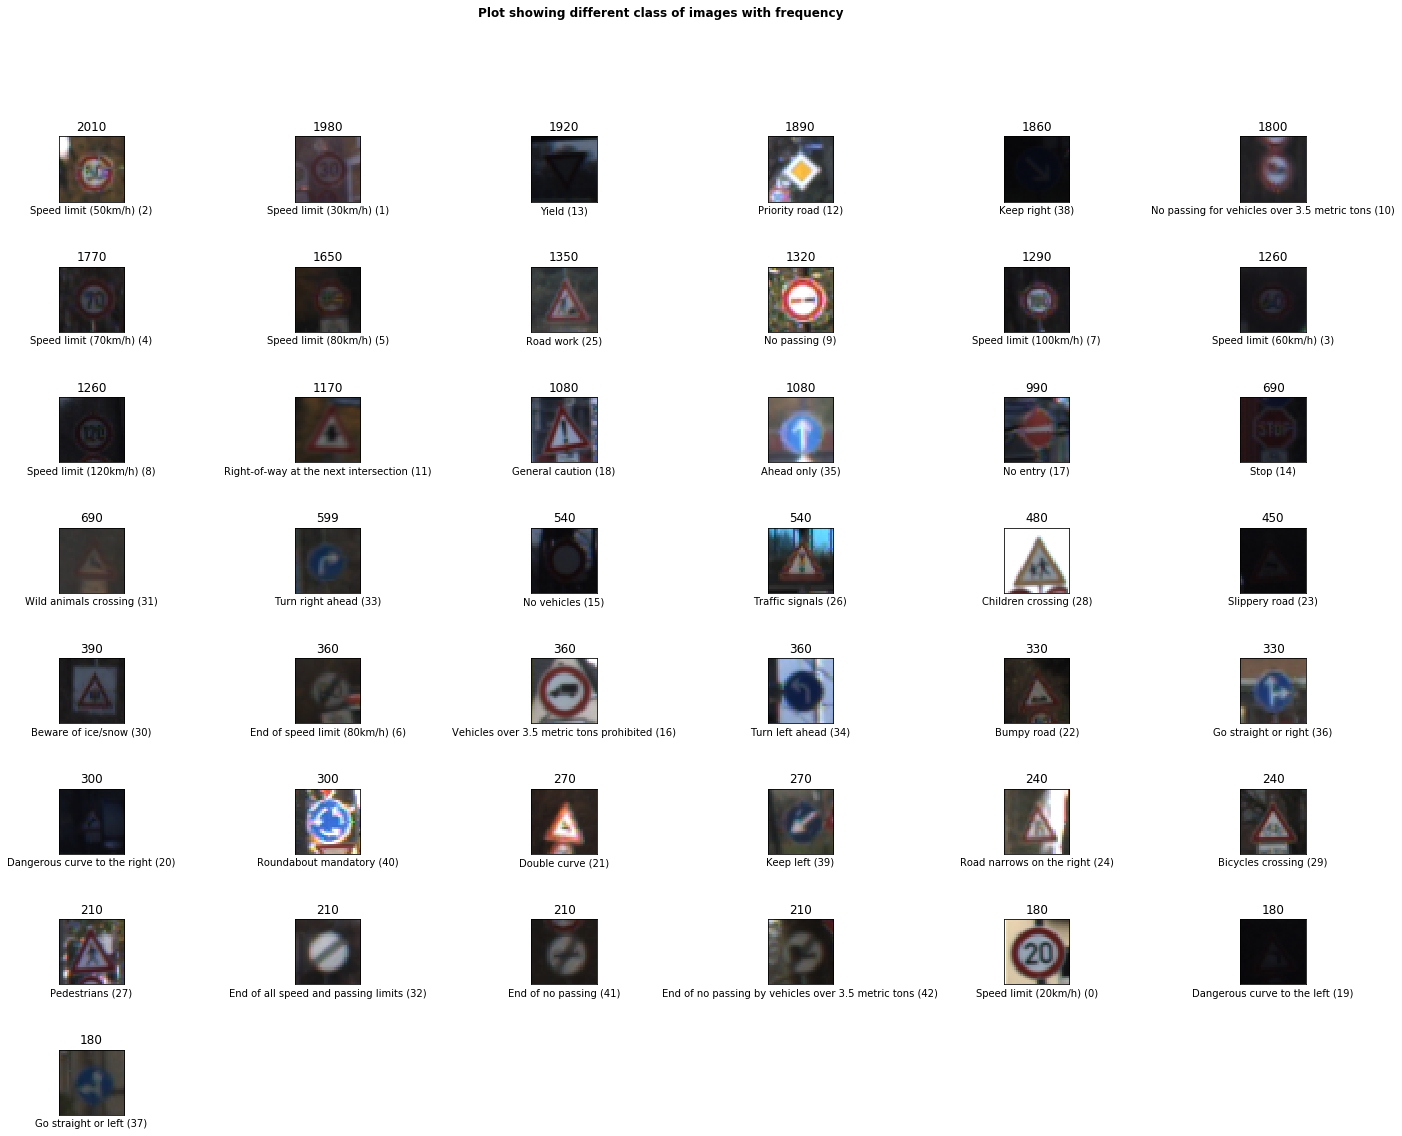

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

def display_images(sorted_class_counts, class_idxs, images):
    fig, axes = plt.subplots(8, 6, figsize=(24, 18),
                             subplot_kw={'xticks': [], 'yticks': []})

    fig.subplots_adjust(hspace=1.0, wspace=0.5)

    fig.suptitle('Plot showing different class of images with frequency', fontsize=12, fontweight='bold')
    for ax, img in zip(axes.flat, sorted_class_counts):
        ax.imshow(images[class_idxs[img[0]]])
        title = str(img[1])
        ax.set_title(title)
        clabel = y_train[class_idxs[img[0]]]
        ax.set_xlabel(str(df.loc[clabel][1]) + ' (' + str(clabel) + ')')
        
    # delete empty axes
    for i in [43, 44, 45, 46, 47]:
        fig.delaxes(axes.flatten()[i])
        
    plt.show()
    
display_images(sorted_class_counts, class_idx, X_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

X_train shape (34799, 32, 32, 1)
X_valid shape (4410, 32, 32, 1)
X_test shape (12630, 32, 32, 1)


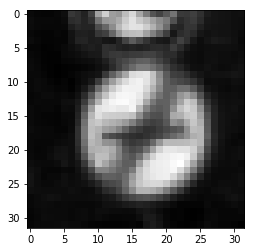

In [6]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

def rgb2gray(img):
    img = np.dot(img[...,:3], [0.299, 0.587, 0.114])
    return np.reshape(img, (32, 32, 1))

def normalize_grayscale(image_data):
    grayscale_min = 0
    grayscale_max = 255
    return ((image_data - grayscale_min)/( grayscale_max - grayscale_min))

# Convert images to grayscale and normalize
def rgb_and_normalize(images):
    processed = []
    for image in images:
        gray_image = rgb2gray(image)
        gray_image = normalize_grayscale(gray_image)
        processed.append(gray_image)
    return np.array(processed)

X_train = rgb_and_normalize(X_train)
X_valid = rgb_and_normalize(X_valid)
X_test = rgb_and_normalize(X_test)
print('X_train shape', X_train.shape)
print('X_valid shape', X_valid.shape)
print('X_test shape', X_test.shape)

plt.imshow(np.reshape(X_train[0], (32, 32)), cmap='gray')

In [7]:
from skimage import transform
from numpy.random import randint, uniform
import math

PIXELS = 32
imageSize = PIXELS * PIXELS
num_features = imageSize

# much faster than the standard skimage.transform.warp method
def fast_warp(img, tf, output_shape, mode='constant'):
    return transform._warps_cy._warp_fast(img, tf.params,
                                          output_shape=output_shape, mode=mode)

def augment(X_batch, y_batch):
    '''
    rotate all images in a given batch between -10 and 10 degrees
    random translations between -10 and 10 pixels in all directions.
    random zooms between 1 and 1.3.
    random shearing between -25 and 25 degrees.
    '''

    n_samples = X_batch.shape[0]

    # set empty copy to hold augmented images so that we don't overwrite
    X_aug = np.empty(shape = (X_batch.shape[0], 1, PIXELS, PIXELS),
                           dtype = 'float32')

    # random rotations betweein -10 and 10 degrees
    dorotate = randint(-10,10)

    # random translations
    trans_1 = randint(-10,10)
    trans_2 = randint(-10,10)

    # random zooms
    zoom = uniform(1, 1.3)

    # shearing
    shear_deg = uniform(-25, 25)

    # set the transform parameters for skimage.transform.warp
    # have to shift to center and then shift back after transformation otherwise
    # rotations will make image go out of frame
    center_shift   = np.array((PIXELS, PIXELS)) / 2.
    tform_center   = transform.SimilarityTransform(translation=-center_shift)
    tform_uncenter = transform.SimilarityTransform(translation=center_shift)

    tform_aug = transform.AffineTransform(rotation = np.deg2rad(dorotate),
                                          #scale =(1/zoom, 1/zoom),
                                          #shear = np.deg2rad(shear_deg),
                                          #translation = (trans_1, trans_2))
                                         )
    tform = tform_center + tform_aug + tform_uncenter

    # images in the batch do the augmentation
    for j in range(X_batch.shape[0]):
        X_aug[j][0] = fast_warp(X_batch[j][0], tform,
                                      output_shape = (PIXELS, PIXELS))

    return X_aug, np.array(y_batch)

def add_to_plot(axs, i, img, label):
    axs[i].axis('off')
    axs[i].imshow(img)
    axs[i].set_title(label)

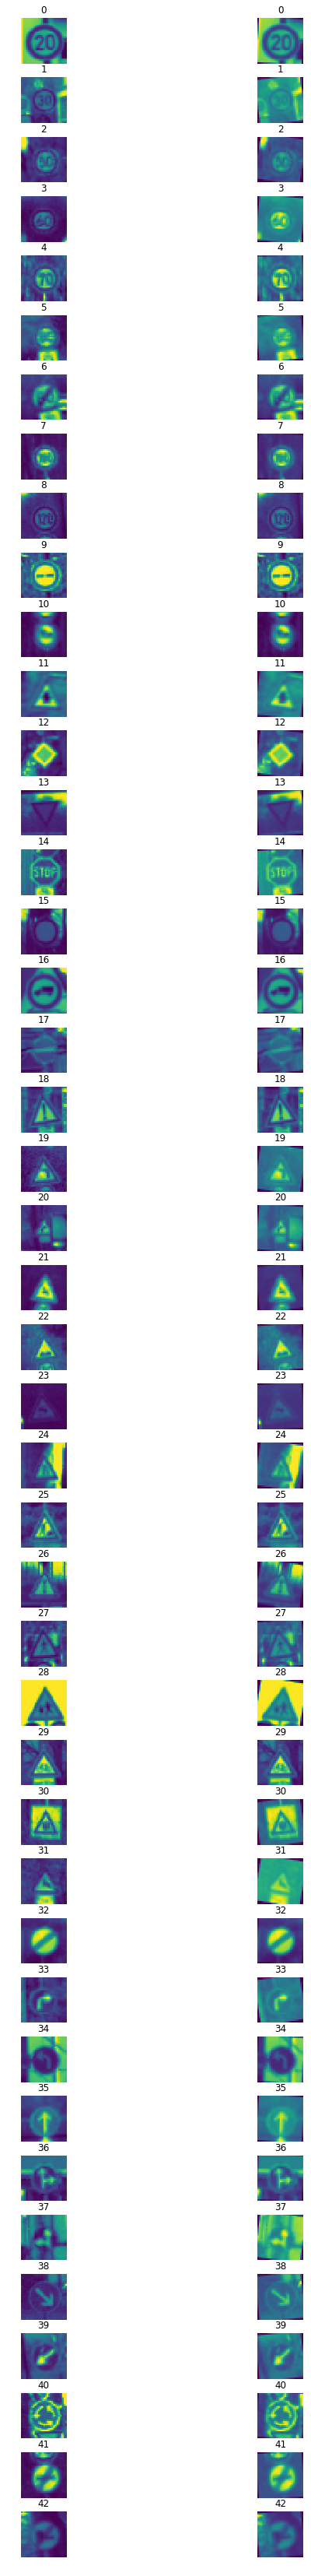

In [8]:
# initialize plot to visualize samples of original and the augmented image
fig, axs = plt.subplots(class_counts.shape[0], 2, figsize=(10, 60))
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()

X_train_aug = []
y_train_aug = []
i = 0
iteridx = 0
for idx, count in zip(class_idx, class_counts):
    
    if count >= mean:
        augmenting_factor  = 5
    else:
        # number of iterations needed to augment the count to nearer to the mean for all classes
        augmenting_factor = math.ceil(mean / count) * 10
    
    for j in range(augmenting_factor):
        xin = X_train[idx:idx+count]
        # reshape image to (1, 32, 32) suitable for augmentation
        xin = np.reshape(xin, (count, 1, 32, 32))
        yin = y_train[idx:idx+count]

        # Plot the original image choosing the first with the same label
        if j == 0:
            add_to_plot(axs, i, xin[0][0], yin[0])
            i += 1

        x, y = augment(xin, yin)

        # reshape image back to (32, 32, 1)
        x = np.reshape(x, (x.shape[0], x.shape[2], x.shape[3], x.shape[1]))
        if iteridx == 0:
            X_train_aug = x
            y_train_aug = y
        else:
            X_train_aug = np.row_stack((X_train_aug, x))
            y_train_aug = np.concatenate((y_train_aug, y))

        # Plot the augmented image
        if j == 0:
            add_to_plot(axs, i, np.reshape(X_train_aug[iteridx], (32, 32)), y_train_aug[iteridx])
            i += 1

        iteridx += count

X_train1 = np.row_stack((X_train, X_train_aug))
y_train1 = np.concatenate((y_train, y_train_aug))

In [9]:
print("Total train images after augmentation", X_train1.shape[0])
print("Total train labels after augmentation", y_train1.shape[0])

classes_aug1, class_counts_aug1 = np.unique(y_train1, return_counts=True)
print('Mean for each class after augmentation', np.mean(class_counts_aug1))
print('class_counts augmented', class_counts_aug1)
print('classes1 augmented', classes_aug1)

X_train, y_train = shuffle(X_train1, y_train1)

Total train images after augmentation 420879
Total train labels after augmentation 420879
Mean for each class after augmentation 9787.88372093
class_counts augmented [ 9180 11880 12060  7560 10620  9900 11160  7740  7560  7920 10800  7020
 11340 11520 14490 11340 11160  5940  6480  9180  9300  8370 10230  9450
  9840  8100 11340  8610 10080  9840 12090 14490  8610 12579 11160  6480
 10230  9180 11160  8370  9300  8610  8610]
classes1 augmented [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


### Model Architecture

In [30]:
### Define your architecture here.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 60
BATCH_SIZE = 100
dropout = 0.50 # Dropout, probability to keep units


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x32.
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 32), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding = 'VALID') + conv1_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x32. Output = 14x14x64.
    conv1 = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides=[1, 2, 2, 1], padding = 'VALID')
    
    # Layer 2: Convolutional. Output = 10x10x64.
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1, 1, 1, 1], padding = 'VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1], strides=[1, 2, 2, 1], padding = 'VALID')

    # Flatten. Input = 5x5x64. Output = 1600.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 1600. Output = 1024.
    fc1_w = tf.Variable(tf.truncated_normal(shape=(1600, 1024), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1 = tf.matmul(fc0, fc1_w) + fc1_b

    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, dropout)
    
    # Layer 4: Fully Connected. Input = 1024. Output = 512.
    fc2_w = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(512))
    fc2 = tf.matmul(fc1, fc2_w) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, dropout)    
    
    # TODO: Layer 5: Fully Connected. Input = 512. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal(shape=(512, 43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_w) + fc3_b

    return logits

In [31]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [32]:
rate = 0.0009

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [33]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [34]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Track the validation accuracies per epoch
validation_accuracies = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        train_accuracy = 0

        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        validation_accuracies.append(validation_accuracy)
        
    saver.save(sess, './lenet_traffic')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.942

EPOCH 2 ...
Validation Accuracy = 0.954

EPOCH 3 ...
Validation Accuracy = 0.955

EPOCH 4 ...
Validation Accuracy = 0.960

EPOCH 5 ...
Validation Accuracy = 0.966

EPOCH 6 ...
Validation Accuracy = 0.965

EPOCH 7 ...
Validation Accuracy = 0.963

EPOCH 8 ...
Validation Accuracy = 0.966

EPOCH 9 ...
Validation Accuracy = 0.962

EPOCH 10 ...
Validation Accuracy = 0.952

EPOCH 11 ...
Validation Accuracy = 0.970

EPOCH 12 ...
Validation Accuracy = 0.966

EPOCH 13 ...
Validation Accuracy = 0.961

EPOCH 14 ...
Validation Accuracy = 0.970

EPOCH 15 ...
Validation Accuracy = 0.966

EPOCH 16 ...
Validation Accuracy = 0.952

EPOCH 17 ...
Validation Accuracy = 0.972

EPOCH 18 ...
Validation Accuracy = 0.974

EPOCH 19 ...
Validation Accuracy = 0.970

EPOCH 20 ...
Validation Accuracy = 0.967

EPOCH 21 ...
Validation Accuracy = 0.965

EPOCH 22 ...
Validation Accuracy = 0.969

EPOCH 23 ...
Validation Accuracy = 0.969

EPOCH 24 ...
Validation Accura

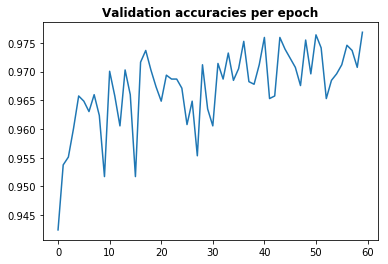

In [35]:
plt.plot(validation_accuracies)
plt.title('Validation accuracies per epoch', fontsize=12, fontweight='bold')

In [36]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.956


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

New images 16


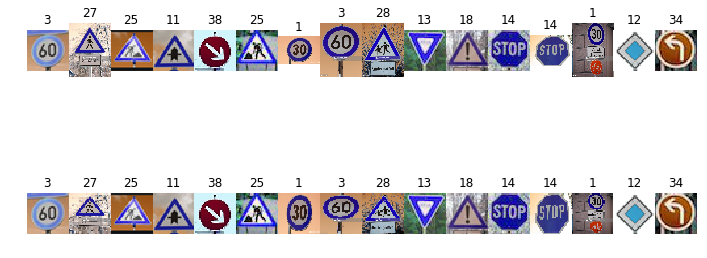

In [37]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import glob

## Hand labeled 
## Read and scale images to (32, 32)
images = []
processed = []
correct_labels = []
image_dir = 'german-traffic-signs/'
for n in glob.glob(image_dir + '*'):
    start = n.find(image_dir)
    end =  n.find('_')
    correct_labels.append(int(n[start + len(image_dir) :end]))
    img = cv2.imread(n)
    images.append(img)
    scaled = cv2.resize(img, (32, 32))
    processed.append(scaled)
    
num_test_images = len(images)
print('New images', num_test_images)


fig, axs = plt.subplots(2, num_test_images, figsize=(12, 6)) 
fig.subplots_adjust(hspace = .001, wspace=.02)
axs = axs.ravel()
for i in range(num_test_images):
    axs[i].axis('off')
    axs[i].imshow(images[i])
    axs[i].set_title(correct_labels[i])

    axs[i + num_test_images].axis('off')
    axs[i + num_test_images].imshow(processed[i])
    axs[i + num_test_images].set_title(correct_labels[i])

## Normalize the images as was done for the input data
processed = rgb_and_normalize(processed)

### Predict the Sign Type for Each Image

In [38]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    class_probs = sess.run(softmax_logits, feed_dict={x: processed})

### Analyze Performance

In [39]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    predictions = sess.run(tf.nn.top_k(class_probs, k=5, sorted=True))

correct = 0
top_predictions = []
for i in range(len(predictions[0])):
    print('Image', i, 'probabilities:', predictions[0][i])
    print('predictions', predictions[1][i])
    label = predictions[1][i][0]
    top_predictions.append(label)
    print('Predicted classes:', [df.loc[label][1] for label in predictions[1][i]])
    print()
    print('Correct label', correct_labels[i])
    print('Correct class:', df.loc[correct_labels[i]][1])
    
    if label == correct_labels[i]:
        correct += 1
    print()
print('Correct predictions', correct)
print('Total new images', num_test_images)
print('Accuracy', float(correct)/num_test_images)
    

Image 0 probabilities: [ 1.  0.  0.  0.  0.]
predictions [3 0 1 2 4]
Predicted classes: ['Speed limit (60km/h)', 'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (70km/h)']

Correct label 3
Correct class: Speed limit (60km/h)

Image 1 probabilities: [ 1.  0.  0.  0.  0.]
predictions [9 0 1 2 3]
Predicted classes: ['No passing', 'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)']

Correct label 27
Correct class: Pedestrians

Image 2 probabilities: [ 1.  0.  0.  0.  0.]
predictions [25  0  1  2  3]
Predicted classes: ['Road work', 'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)']

Correct label 25
Correct class: Road work

Image 3 probabilities: [ 1.  0.  0.  0.  0.]
predictions [11  0  1  2  3]
Predicted classes: ['Right-of-way at the next intersection', 'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)']

Correct label

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

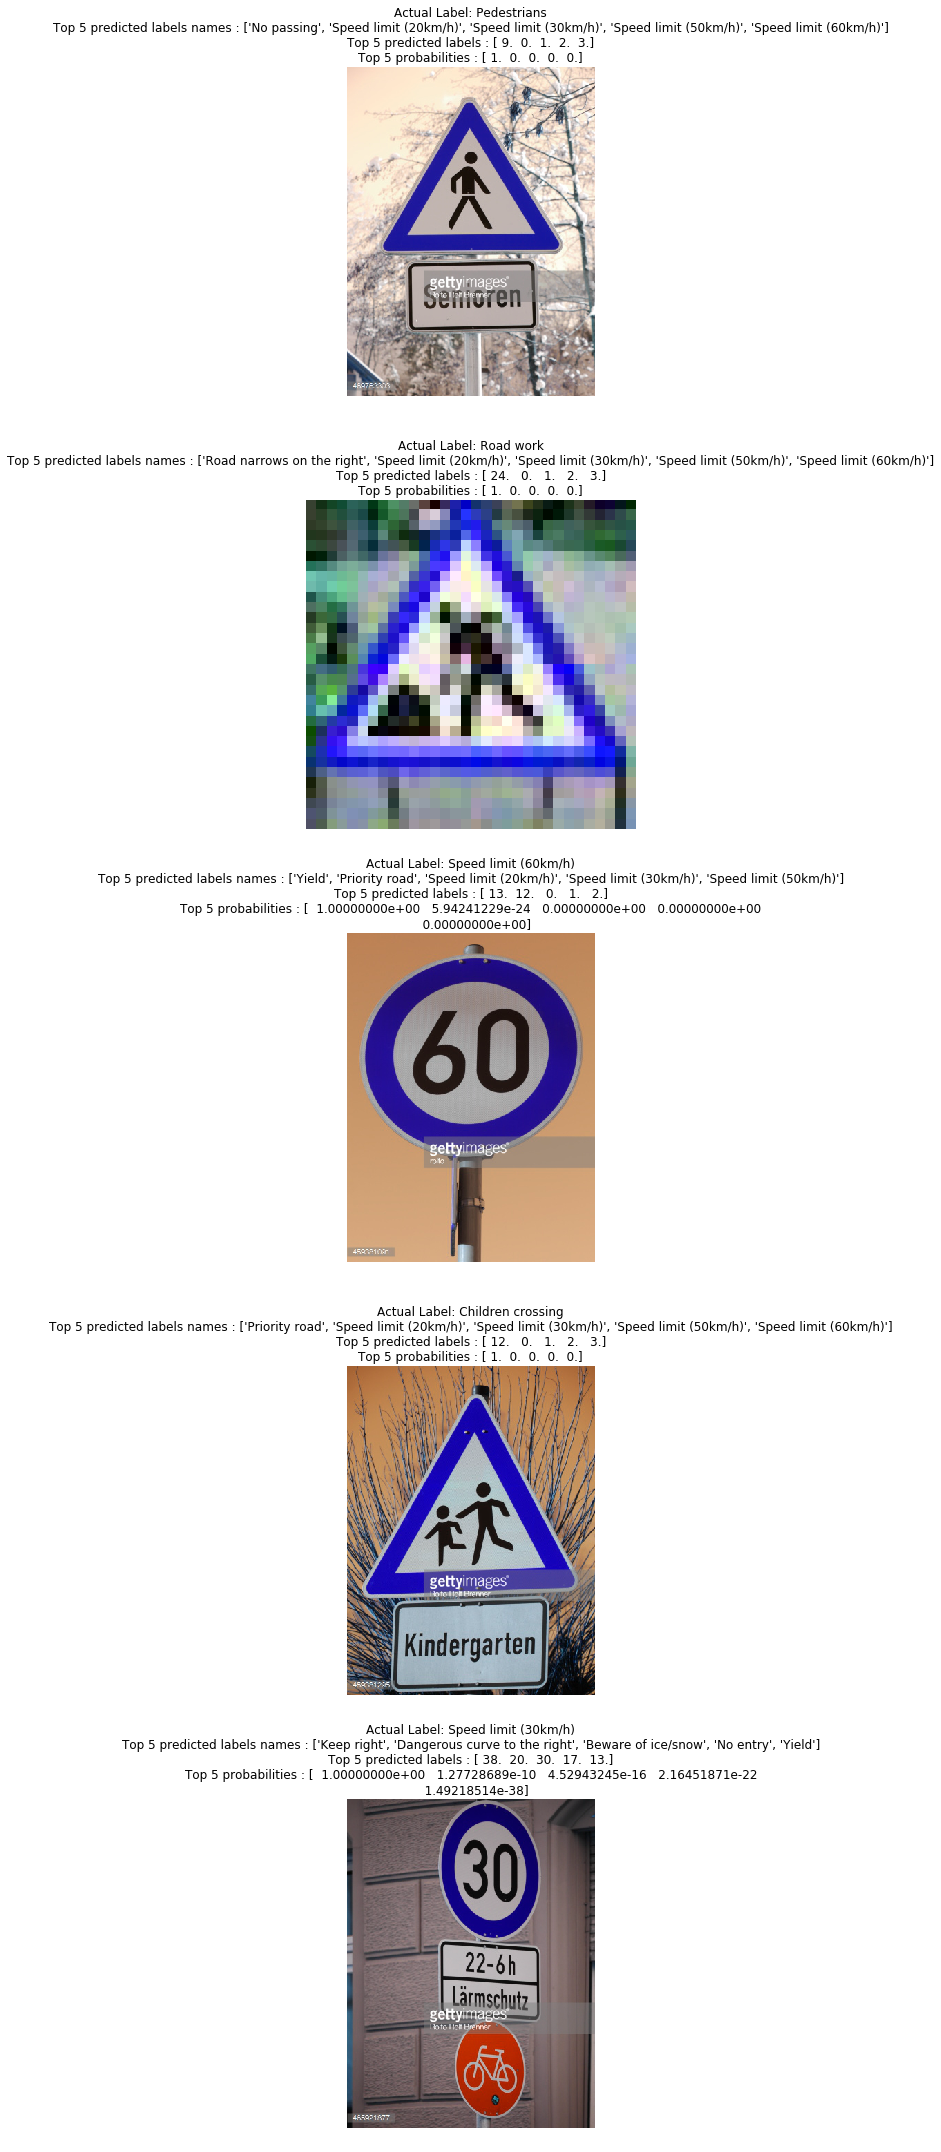

In [40]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
from matplotlib import gridspec

incorect_idxs = np.array(top_predictions) != np.array(correct_labels)
incorrect_classified = np.array(images)[incorect_idxs]
top_5_probs = np.array(predictions)[0][incorect_idxs]
top_5_labels = np.array(predictions)[1][incorect_idxs]
correct_labels_for_incorrects = np.array(correct_labels)[incorect_idxs]

incorrects = len(incorrect_classified)
fig = plt.figure()
fig, axs = plt.subplots(incorrects, 1, figsize=(10, 30))
fig.subplots_adjust(hspace = 2, wspace=0.5)

count_idx = 0    
for j in range(incorrects):
    title = 'Actual Label: ' \
    + str(df.loc[correct_labels_for_incorrects[j]][1]) \
    + '\nTop 5 predicted labels names : ' + str([df.loc[label][1] for label in top_5_labels[j]]) \
    + '\nTop 5 predicted labels : '+ str(top_5_labels[j]) + '\nTop 5 probabilities : ' + str(top_5_probs[j])    
    ax0 = axs[j]
    ax0.axis('off')
    ax0.imshow(incorrect_classified[j])
    ax0.set_title(title)
plt.tight_layout()

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 